## Import libraries

In [7]:
import pandas as pd
import numpy as np
import requests
import io
import seaborn as sns
from matplotlib import pyplot as plt

## Extracting data from github

In [8]:
url = "https://raw.githubusercontent.com/simoneSantoni/data-viz-smm635/master/data/koopAndTobias/koop_tobias.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head(5)

,PERSONID,EDUC,LOGWAGE,POTEXPER,TIMETRND,ABILITY,MOTHERED,FATHERED,BRKNHOME,SIBLINGS
0,1,13,1.82,1,0,1.0,12,12,0,1
1,1,18,3.29,3,7,1.0,12,12,0,1
2,1,18,3.21,5,9,1.0,12,12,0,1
3,1,18,3.06,6,10,1.0,12,12,0,1
4,2,15,2.14,4,6,1.5,12,12,0,1


In [5]:
# %% data cleaning
# Getting the average of each variable for each person
df_educ = pd.DataFrame(df.groupby("PERSONID", as_index=False)["EDUC"].aggregate(np.mean))
df_wage = pd.DataFrame(df.groupby("PERSONID", as_index=False)["LOGWAGE"].aggregate(np.mean))
df_abi = pd.DataFrame(df.groupby("PERSONID", as_index=False)["ABILITY"].aggregate(np.mean))
df_mom = pd.DataFrame(df.groupby("PERSONID", as_index=False)["MOTHERED"].aggregate(np.mean))
df_dad = pd.DataFrame(df.groupby("PERSONID", as_index=False)["FATHERED"].aggregate(np.mean))
df_sib = pd.DataFrame(df.groupby("PERSONID", as_index=False)["SIBLINGS "].aggregate(np.mean))

## Creating univariate plots

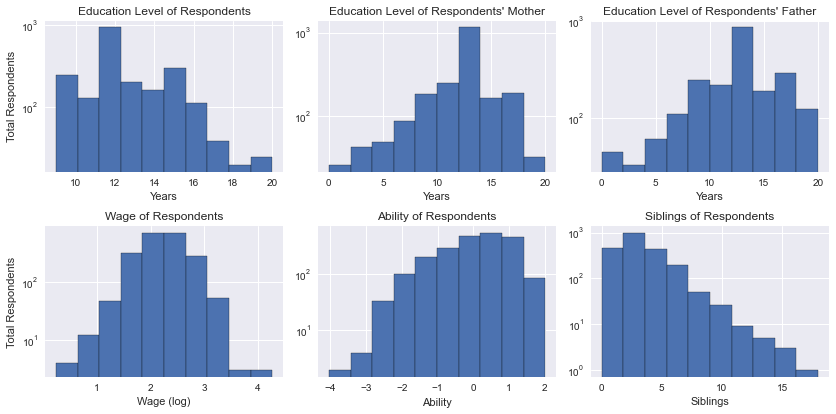

In [6]:
# set the style
plt.style.use('seaborn')

# create the figure
fig = plt.figure(figsize=(11.69,8.27))

# populate the figure with a plot
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

# plot
ax1.hist(df_educ["EDUC"], log=True, edgecolor='k')
ax2.hist(df_mom["MOTHERED"], log=True, edgecolor='k')
ax3.hist(df_dad["FATHERED"], log=True, edgecolor='k')
ax4.hist(df_wage["LOGWAGE"], log=True, edgecolor='k')
ax5.hist(df_abi["ABILITY"], log=True, edgecolor='k')
ax6.hist(df_sib["SIBLINGS "], log=True, edgecolor='k')

# axes label
ax1.set_title("Education Level of Respondents")
ax1.set_xlabel('Years')
ax1.set_ylabel('Total Respondents')

ax2.set_title("Education Level of Respondents' Mother")
ax2.set_xlabel('Years')

ax3.set_title("Education Level of Respondents' Father")
ax3.set_xlabel('Years')

ax4.set_title("Wage of Respondents")
ax4.set_xlabel('Wage (log)')
ax4.set_ylabel('Total Respondents')

ax5.set_title("Ability of Respondents")
ax5.set_xlabel('Ability')

ax6.set_title("Siblings of Respondents")
ax6.set_xlabel('Siblings')

# adjusting the spacing between subplots
plt.tight_layout(pad=1.0)

# showing the plot
plt.show()

## Creating bivariate plots

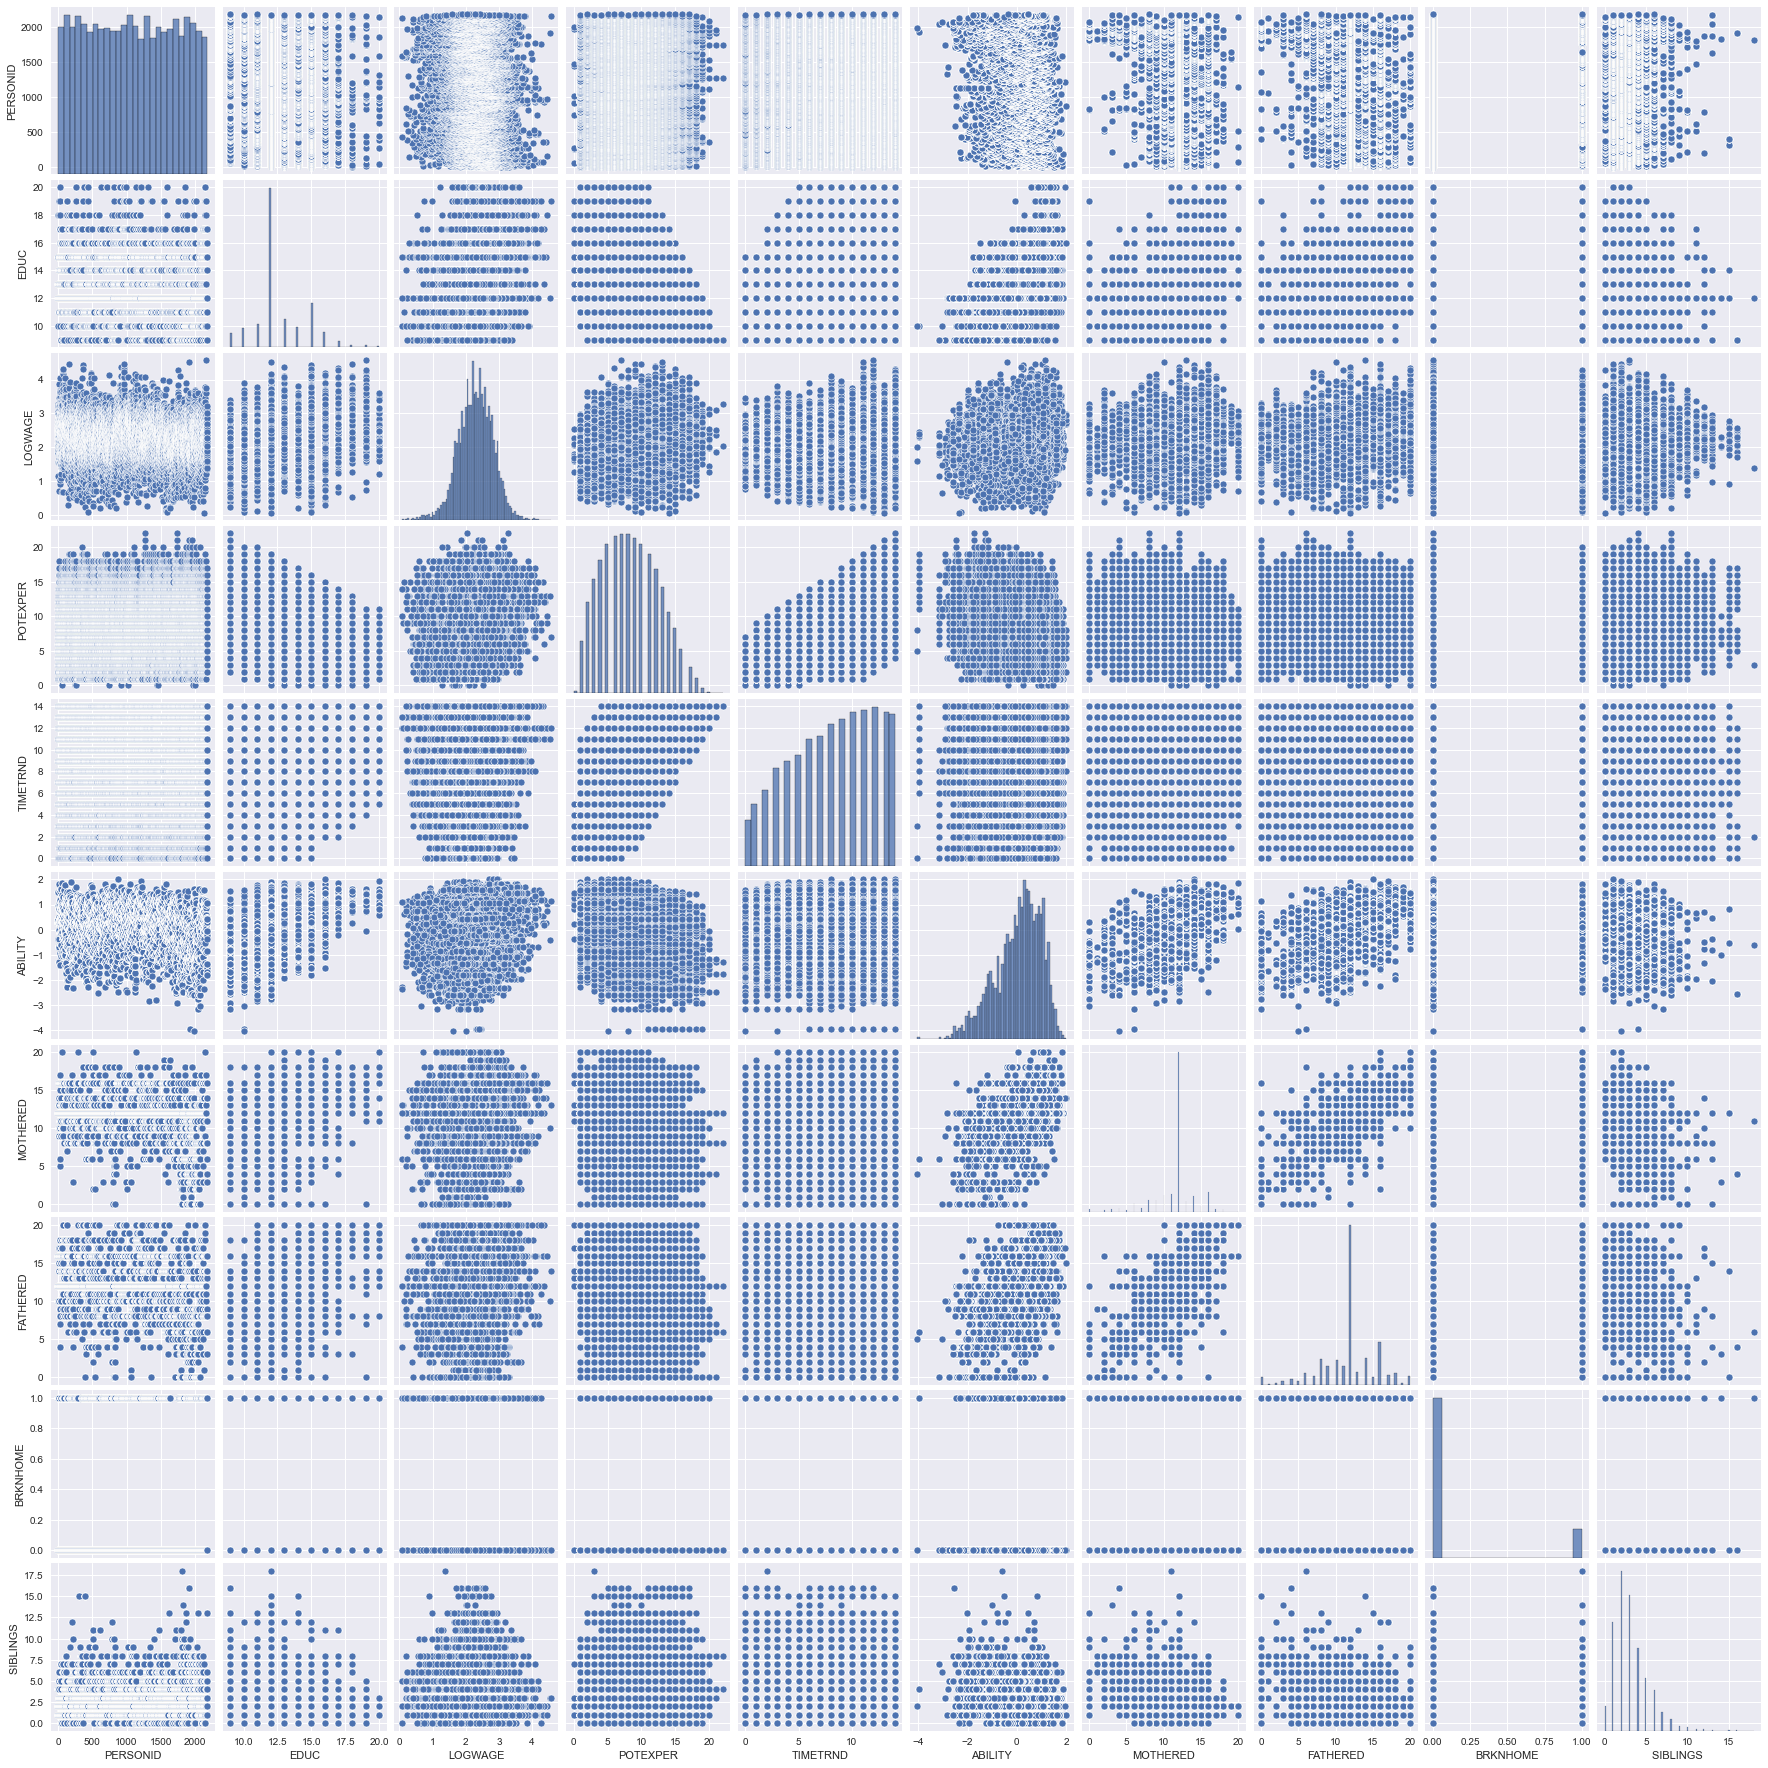

In [10]:
sns.pairplot(df)